In [ ]:
import pandas as pd
import numpy as np

#reading dataset and removing unnecesary columns
data = pd.read_csv("collected_data.csv")
data.drop(columns=["id", "collected", "traffic_delay"], inplace=True)
data = data[data['price'] != 0]

data['historic_adjusted'] = data['time'] / data['historic_time']
data['no_traffic_adjusted'] = data['time'] / data['no_traffic_time']
data.drop(columns=["historic_time", "no_traffic_time"], inplace=True)



# Extracting the day of the week  and time from start-time.
days = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
data['day_of_week'] = data['start_time'].str[:3].map(lambda x: days.index(x))
data['time_of_day'] = data['start_time'].str[16:18].astype(int) + data['start_time'].str[19:21].astype(int) / 60
print(data.head())


data.drop(columns=["start_time"], inplace=True)


data['day_of_week_sin'] = np.sin(data['day_of_week'] * (2 * np.pi / 7))
data['day_of_week_cos'] = np.cos(data['day_of_week'] * (2 * np.pi / 7))

data['time_of_day_sin'] = np.sin(data['time_of_day'] * (2 * np.pi / 24))
data['time_of_day_cos'] = np.cos(data['time_of_day'] * (2 * np.pi / 24))

data.drop(columns=["day_of_week"], inplace=True)
data.drop(columns=["time_of_day"], inplace=True)

# Print the resulting dataframe
print(data)


   start_latitude  start_longitude  end_latitude  end_longitude   time  \
0       30.583805       -96.307337     30.584924     -96.308540   54.0   
1       30.583805       -96.307337     30.584924     -96.308540   54.0   
2       30.628834       -96.341929     30.618394     -96.345599  222.0   
3       30.572423       -96.326351     30.602013     -96.285100  594.0   
4       30.627736       -96.340566     30.654920     -96.275239  891.0   

   distance  price                                         start_time  \
0     168.0   7.87  Tue Apr 09 2024 16:02:12 GMT-0500 (Central Day...   
1     168.0   7.87  Tue Apr 09 2024 15:44:46 GMT-0500 (Central Day...   
2    1571.0   7.87  Tue Apr 09 2024 15:44:46 GMT-0500 (Central Day...   
3    8003.0  12.99  Tue Apr 09 2024 15:44:46 GMT-0500 (Central Day...   
4   12933.0  15.92  Tue Apr 09 2024 15:44:46 GMT-0500 (Central Day...   

   historic_adjusted  no_traffic_adjusted  day_of_week  time_of_day  
0            1.00000             1.000000     

In [ ]:
print(X_train.head())

      time  distance  historic_adjusted  no_traffic_adjusted  day_of_week_sin  \
382  984.0   17345.0           1.000000             1.019689         0.781831   
55   568.0    7088.0           1.044118             1.044118         0.974928   
76   711.0    8983.0           1.047128             1.047128         0.974928   
25   208.0    1571.0           0.981132             0.981132         0.974928   
82   328.0    3075.0           1.041270             1.041270         0.974928   

     day_of_week_cos  time_of_day_sin  time_of_day_cos  
382         0.623490        -0.923880        -0.382683  
55         -0.222521        -0.945519         0.325568  
76         -0.222521        -0.863836         0.503774  
25         -0.222521        -0.997859         0.065403  
82         -0.222521        -0.836286         0.548293  


In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


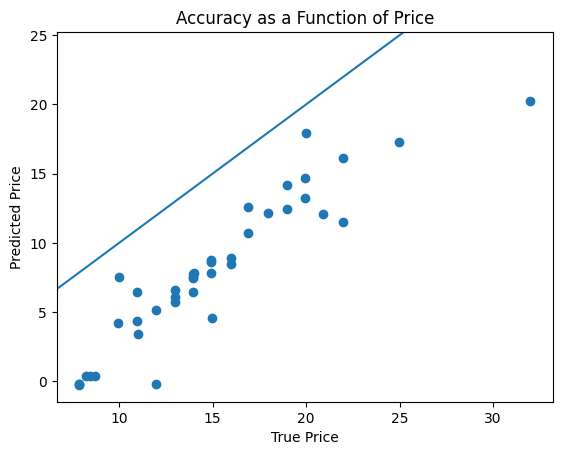

R^2 Score on Test Set: -0.9809841555654426
Best hyperparameters: {'batch_size': 256, 'epochs': 30}


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization, ReLU, BatchNormalization

model = tf.keras.Sequential([
    Normalization(input_shape=(X_train.shape[1],)),
    Dense(128),
    BatchNormalization(),
    ReLU(),
    Dropout(0.1),
    Dense(256),
    BatchNormalization(),
    ReLU(),
    Dropout(0.1),
    Dense(64),
    BatchNormalization(),
    ReLU(),
    Dropout(0.1),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

# dropping irrelevant features and getting target
X = data.drop(columns=["price", "start_latitude", "start_longitude", "end_latitude", "end_longitude"])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# y_train=y_train[X_train['time']>360]
# X_train=X_train[X_train['time']>360]

model.fit(X_train, y_train,epochs =30, batch_size=128,verbose=False)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Accuracy as a Function of Price")
plt.axline((24, 24), slope=1)
plt.show()

print("R^2 Score on Test Set:", r2_test)
print("Best hyperparameters:", best_params)


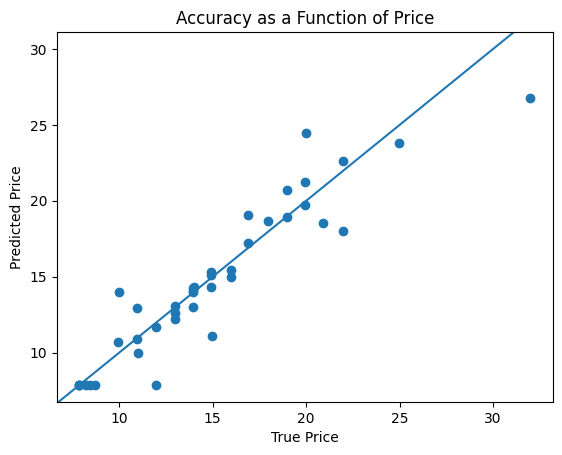

R^2 Score on Test Set: 0.868343215919917
Best hyperparameters: {'batch_size': 256, 'epochs': 30}


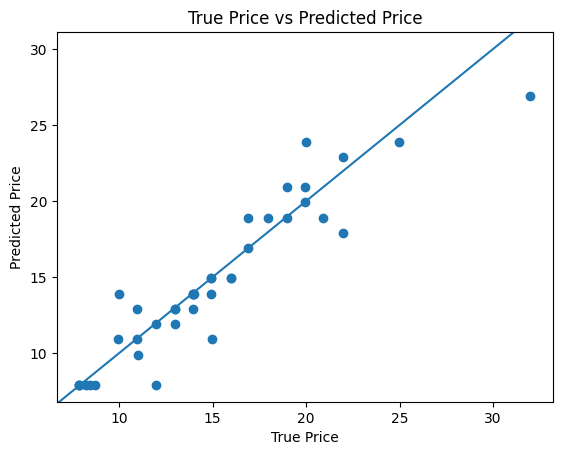

R^2 Score on Test Set: 0.8726968629857244
Best hyperparameters: {'batch_size': 256, 'epochs': 30}


In [ ]:
y_pred1 = np.copy(y_pred)
y_pred1 += 6.5
y_pred1[y_pred1 < 7.87] = 7.87

r2_test = r2_score(y_test, y_pred1)

plt.scatter(y_test, y_pred1)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Accuracy as a Function of Price")
plt.axline((30, 30), slope=1)
plt.show()

print("R^2 Score on Test Set:", r2_test)
print("Best hyperparameters:", best_params)

rounded_y_pred1 = np.round(y_pred1) - 0.10

r2_test = r2_score(y_test, rounded_y_pred1)

plt.scatter(y_test, rounded_y_pred1)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("True Price vs Predicted Price")
plt.axline((30, 30), slope=1)
plt.show()

print("R^2 Score on Test Set:", r2_test)
print("Best hyperparameters:", best_params)


In [ ]:
mse = mean_squared_error(y_test, rounded_y_pred1)
print(np.sqrt(mse))

1.836105956850467


In [ ]:

tf.saved_model.save(model, 'tf_model')